# Classification experiments with SVC with **Quantum** kernal, QSVC (**Quantum** support vector machine), CircuitQNN classifier (Circuit **Quantum** neural network), VQC (Variational **Quantum** classifier) on generated dataset 
1. of size 100 (type A)
2. of size 100 (type B)
3. of size 200 (type A)
4. of size 200 (type B) 

(A is classifieable B not classifieable)

## **(1) A dataset of size 100 (type A) generation by SVC with quantum kernal, QSVC, CQNN, VQC**

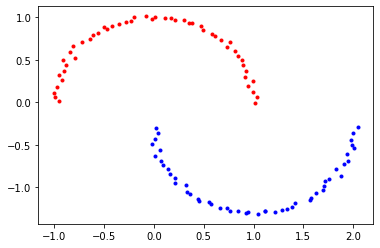

In [ ]:
# Two semicircles generation
import matplotlib.pyplot as plt
import numpy as np

def make_semi_circles(n_samples, thk, rad, sep, plot):
    noisey = np.random.uniform(low=-thk/100.0, high=thk/100.0, size=(n_samples // 2))
    noisex = np.random.uniform(low=-rad/100.0, high=rad/100.0, size=(n_samples // 2))
    
    separation = np.ones(n_samples // 2)*((-sep*0.1)-0.6)
    
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    
    # generator = check_random_state(random_state)
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out)) + noisex
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out)) + noisey
    inner_circ_x = (1 - np.cos(np.linspace(0, np.pi, n_samples_in))) + noisex
    inner_circ_y = (1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5) + noisey + separation
    
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.ones(n_samples_in, dtype=np.intp)*-1,
                   np.ones(n_samples_out, dtype=np.intp)])
    
    if plot:
        plt.plot(outer_circ_x, outer_circ_y, 'r.')
        plt.plot(inner_circ_x, inner_circ_y, 'b.')
        plt.show()

    return X, y

X, y = make_semi_circles(n_samples=100, thk=2, rad=5, sep=2, plot=True)

In [ ]:
# split the data set as 15% in test set and 85% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
!pip install qiskit[machine-learning]
!pip install umap-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.exceptions import QiskitMachineLearningError
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.datasets import iris

import umap
from typing import Union

seed = 12345
algorithm_globals.random_seed = seed

## Configure feature map and backend

In [ ]:
num_classes = 2
num_qubits = 2 # num_features
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
backend = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024, seed_simulator=seed, seed_transpiler=seed)
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
ansatz = RealAmplitudes(num_qubits, reps=1)

### SVC with quantum kernal (A100)

Training time =  83.81719
Testing time =  42.55247
ScoreSVCQK_A100 =  0.8


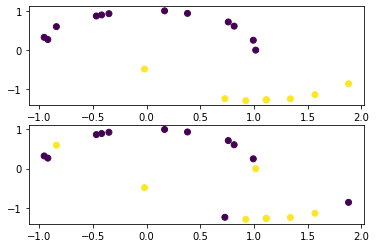

In [ ]:
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
svc = SVC(kernel=kernel.evaluate)

# To predict the time of training
from time import time
t0_before_training_SVCQK_A100 = time()
# To train
svc.fit(x_train, y_train)
# To store training time globally
train_time_SVCQK_A100 = round(time()-t0_before_training_SVCQK_A100, 5)
print("Training time = ",train_time_SVCQK_A100)

# To predict the time of testing
t0_before_testning_SVCQK_A100 = time()
# To test
predicted_y_test = svc.predict(x_test)
# To store testing time globally
test_time_SVCQK_A100 = round(time()-t0_before_testning_SVCQK_A100, 5)
print("Testing time = ",test_time_SVCQK_A100)

# To store the score globally
ScoreSVCQK_A100 = accuracy_score(y_test, predicted_y_test)
print("ScoreSVCQK_A100 = ",ScoreSVCQK_A100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### QSVC (A100)

Training time =  84.39796
Testiing time =  40.97769
ScoreQSVC_A100 =  0.8


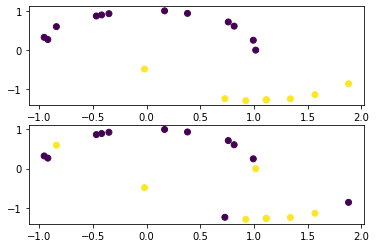

In [ ]:
qsvc = QSVC(quantum_kernel=kernel)

# To predict the time of training
from time import time
t1_before_training_QSVC_A100 = time()
# To train
qsvc.fit(x_train, y_train)
# To store training time globally
train_time_QSVC_A100 = round(time()-t1_before_training_QSVC_A100, 5)
print("Training time = ",train_time_QSVC_A100)

# To predict the time of testing
t1_before_testning_QSVC_A100 = time()
# To test
predicted_y_test = qsvc.predict(x_test)
# To store testing time globally
test_time_QSVC_A100 = round(time()-t1_before_testning_QSVC_A100, 5)
print("Testiing time = ", test_time_QSVC_A100)

# To store the score globally
ScoreQSVC_A100 = accuracy_score(y_test, predicted_y_test)
print("ScoreQSVC_A100 = ",ScoreQSVC_A100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### VQC (A100)

Training time =  166.18594
Testiing time =  0.58321
ScoreVQC_A100 =  0.3


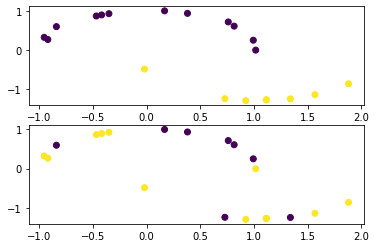

In [ ]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz, 
          loss='cross_entropy',
          optimizer=COBYLA(), 
          quantum_instance=backend)

# To predict the time of training
from time import time
t2_before_training_VQC_A100 = time()
# To train
train_y_one_hot = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
vqc.fit(x_train, train_y_one_hot)
# To store training time globally
train_time_VQC_A100 = round(time()-t2_before_training_VQC_A100, 5)
print("Training time = ",train_time_VQC_A100)

# To predict the time of testing
t2_before_testning_VQC_A100 = time()
# To test
predicted_y_test = vqc.predict(x_test)
predicted_y_test = np.argmax(predicted_y_test, axis=1) # reverse one-hot encoding
# To store testing time globally
test_time_VQC_A100 = round(time()-t2_before_testning_VQC_A100, 5)
print("Testiing time = ", test_time_VQC_A100)

# To store the score globally
ScoreVQC_A100 = accuracy_score(y_test, predicted_y_test)
print("ScoreVQC_A100 = ", ScoreVQC_A100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### CircuitQNN classifier (A100)

Training time =  190.04224
Testiing time =  42.55734
ScoreQNN_A100 =  0.8


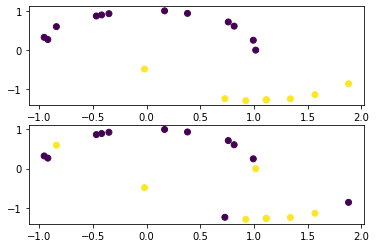

In [ ]:
# construct quantum circuit
qc = QuantumCircuit(num_qubits)
qc.append(feature_map, range(num_qubits))
qc.append(ansatz, range(num_qubits))
# qc.decompose().draw()

# parity maps bitstrings to 0 or 1
def parity(x):
    return '{:b}'.format(x).count('1') % num_classes
output_shape = num_classes  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

# construct QNN
circuit_qnn = CircuitQNN(circuit=qc, 
                         input_params=feature_map.parameters,
                         weight_params=ansatz.parameters,
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=backend)

# construct classifier
circuit_classifier = NeuralNetworkClassifier(neural_network=circuit_qnn, optimizer=COBYLA())

# To predict the time of training
from time import time
t3_before_training_QNN_A100 = time()
# To train
circuit_classifier.fit(x_train, y_train)
train_time_QNN_A100 = round(time()-t3_before_training_QNN_A100, 5)
print("Training time = ",train_time_QNN_A100)

# To predict the time of testing
t3_before_testning_QNN_A100 = time()
# To test
predicted_y_test_QNN = qsvc.predict(x_test)
test_time_QNN_A100 = round(time()-t3_before_testning_QNN_A100, 5)
print("Testiing time = ", test_time_QNN_A100)

ScoreQNN_A100 = accuracy_score(y_test, predicted_y_test_QNN)
print("ScoreQNN_A100 = ", ScoreQNN_A100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test_QNN)

## **(2) A dataset of size 100 (type B) generation by SVC with quantum kernal, QSVC, CQNN, VQC**

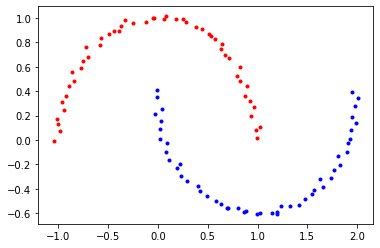

In [ ]:
# Two semicircles generation
import matplotlib.pyplot as plt
import numpy as np

def make_semi_circles(n_samples, thk, rad, sep, plot):
    noisey = np.random.uniform(low=-thk/100.0, high=thk/100.0, size=(n_samples // 2))
    noisex = np.random.uniform(low=-rad/100.0, high=rad/100.0, size=(n_samples // 2))
    
    separation = np.ones(n_samples // 2)*((-sep*0.1)-0.6)
    
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    
    # generator = check_random_state(random_state)
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out)) + noisex
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out)) + noisey
    inner_circ_x = (1 - np.cos(np.linspace(0, np.pi, n_samples_in))) + noisex
    inner_circ_y = (1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5) + noisey + separation
    
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.ones(n_samples_in, dtype=np.intp)*-1,
                   np.ones(n_samples_out, dtype=np.intp)])
    
    if plot:
        plt.plot(outer_circ_x, outer_circ_y, 'r.')
        plt.plot(inner_circ_x, inner_circ_y, 'b.')
        plt.show()

    return X, y

X, y = make_semi_circles(n_samples=100, thk=2, rad=5, sep=-5, plot=True)

In [ ]:
# split the data set as 20% in test set and 80% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### SVC with quantum kernal (B100)

Training time =  83.01313
Testing time =  42.52731
ScoreSVCQK_B100 =  0.85


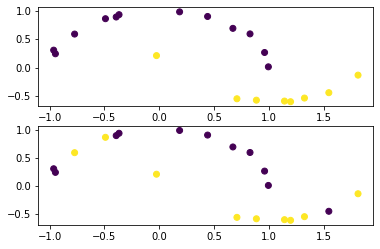

In [ ]:
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
svc = SVC(kernel=kernel.evaluate)

# To predict the time of training
from time import time
t0_before_training_SVCQK_B100 = time()
# To train
svc.fit(x_train, y_train)
# To store training time globally
train_time_SVCQK_B100 = round(time()-t0_before_training_SVCQK_B100, 5)
print("Training time = ",train_time_SVCQK_B100)

# To predict the time of testing
t0_before_testning_SVCQK_B100 = time()
# To test
predicted_y_test = svc.predict(x_test)
# To store testing time globally
test_time_SVCQK_B100 = round(time()-t0_before_testning_SVCQK_B100, 5)
print("Testing time = ",test_time_SVCQK_B100)

# To store the score globally
ScoreSVCQK_B100 = accuracy_score(y_test, predicted_y_test)
print("ScoreSVCQK_B100 = ",ScoreSVCQK_B100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### QSVC (B100)

Training time =  83.16945
Testiing time =  42.38876
ScoreQSVC_B100 =  0.85


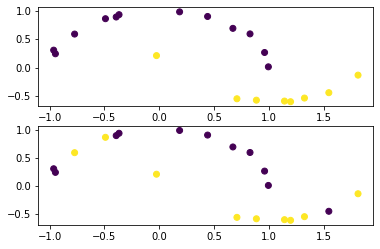

In [ ]:
qsvc = QSVC(quantum_kernel=kernel)

# To predict the time of training
from time import time
t1_before_training_QSVC_B100 = time()
# To train
qsvc.fit(x_train, y_train)
# To store training time globally
train_time_QSVC_B100 = round(time()-t1_before_training_QSVC_B100, 5)
print("Training time = ",train_time_QSVC_B100)

# To predict the time of testing
t1_before_testning_QSVC_B100 = time()
# To test
predicted_y_test = qsvc.predict(x_test)
# To store testing time globally
test_time_QSVC_B100 = round(time()-t1_before_testning_QSVC_B100, 5)
print("Testiing time = ", test_time_QSVC_B100)

# To store the score globally
ScoreQSVC_B100 = accuracy_score(y_test, predicted_y_test)
print("ScoreQSVC_B100 = ",ScoreQSVC_B100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### VQC (B100)

Training time =  154.16342
Testiing time =  0.59865
ScoreVQC_B100 =  0.3


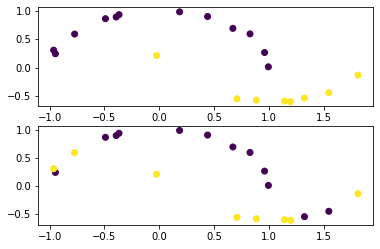

In [ ]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz, 
          loss='cross_entropy',
          optimizer=COBYLA(), 
          quantum_instance=backend)

# To predict the time of training
from time import time
t2_before_training_VQC_B100 = time()
# To train
train_y_one_hot = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
vqc.fit(x_train, train_y_one_hot)
# To store training time globally
train_time_VQC_B100 = round(time()-t2_before_training_VQC_B100, 5)
print("Training time = ",train_time_VQC_B100)

# To predict the time of testing
t2_before_testning_VQC_B100 = time()
# To test
predicted_y_test = vqc.predict(x_test)
predicted_y_test = np.argmax(predicted_y_test, axis=1) # reverse one-hot encoding
# To store testing time globally
test_time_VQC_B100 = round(time()-t2_before_testning_VQC_B100, 5)
print("Testiing time = ", test_time_VQC_B100)

# To store the score globally
ScoreVQC_B100 = accuracy_score(y_test, predicted_y_test)
print("ScoreVQC_B100 = ", ScoreVQC_B100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### CircuitQNN classifier (B100)

Training time =  146.43468
Testiing time =  42.74762
ScoreQNN_B100 =  0.85


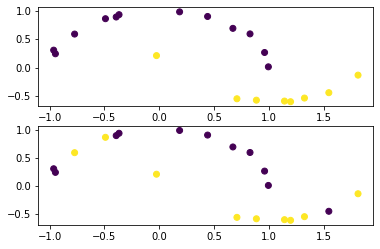

In [ ]:
# construct quantum circuit
qc = QuantumCircuit(num_qubits)
qc.append(feature_map, range(num_qubits))
qc.append(ansatz, range(num_qubits))
# qc.decompose().draw()

# parity maps bitstrings to 0 or 1
def parity(x):
    return '{:b}'.format(x).count('1') % num_classes
output_shape = num_classes  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

# construct QNN
circuit_qnn = CircuitQNN(circuit=qc, 
                         input_params=feature_map.parameters,
                         weight_params=ansatz.parameters,
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=backend)

# construct classifier
circuit_classifier = NeuralNetworkClassifier(neural_network=circuit_qnn, optimizer=COBYLA())

# To predict the time of training
from time import time
t3_before_training_QNN_B100 = time()
# To train
circuit_classifier.fit(x_train, y_train)
train_time_QNN_B100 = round(time()-t3_before_training_QNN_B100, 5)
print("Training time = ",train_time_QNN_B100)

# To predict the time of testing
t3_before_testning_QNN_B100 = time()
# To test
predicted_y_test_QNN = qsvc.predict(x_test)
test_time_QNN_B100 = round(time()-t3_before_testning_QNN_B100, 5)
print("Testiing time = ", test_time_QNN_B100)

ScoreQNN_B100 = accuracy_score(y_test, predicted_y_test_QNN)
print("ScoreQNN_B100 = ", ScoreQNN_B100)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test_QNN)

## **(3) A dataset of size 200 (type A) generation by SVC with quantum kernal, QSVC, CQNN, VQC**

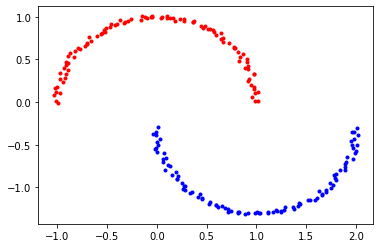

In [ ]:
# Two semicircles generation
import matplotlib.pyplot as plt
import numpy as np

def make_semi_circles(n_samples, thk, rad, sep, plot):
    noisey = np.random.uniform(low=-thk/100.0, high=thk/100.0, size=(n_samples // 2))
    noisex = np.random.uniform(low=-rad/100.0, high=rad/100.0, size=(n_samples // 2))
    
    separation = np.ones(n_samples // 2)*((-sep*0.1)-0.6)
    
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    
    # generator = check_random_state(random_state)
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out)) + noisex
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out)) + noisey
    inner_circ_x = (1 - np.cos(np.linspace(0, np.pi, n_samples_in))) + noisex
    inner_circ_y = (1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5) + noisey + separation
    
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.ones(n_samples_in, dtype=np.intp)*-1,
                   np.ones(n_samples_out, dtype=np.intp)])
    
    if plot:
        plt.plot(outer_circ_x, outer_circ_y, 'r.')
        plt.plot(inner_circ_x, inner_circ_y, 'b.')
        plt.show()

    return X, y

X, y = make_semi_circles(n_samples=200, thk=2, rad=5, sep=2, plot=True)

In [ ]:
# split the data set as 15% in test set and 85% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SVC with quantum kernal (A200)

Training time =  336.50589
Testing time =  168.76753
ScoreSVCQK_A200 =  0.8


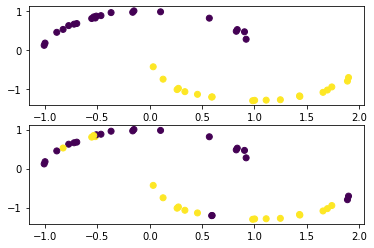

In [ ]:
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
svc = SVC(kernel=kernel.evaluate)

# To predict the time of training
from time import time
t0_before_training_SVCQK_A200 = time()
# To train
svc.fit(x_train, y_train)
# To store training time globally
train_time_SVCQK_A200 = round(time()-t0_before_training_SVCQK_A200, 5)
print("Training time = ",train_time_SVCQK_A200)

# To predict the time of testing
t0_before_testning_SVCQK_A200 = time()
# To test
predicted_y_test = svc.predict(x_test)
# To store testing time globally
test_time_SVCQK_A200 = round(time()-t0_before_testning_SVCQK_A200, 5)
print("Testing time = ",test_time_SVCQK_A200)

# To store the score globally
ScoreSVCQK_A200 = accuracy_score(y_test, predicted_y_test)
print("ScoreSVCQK_A200 = ",ScoreSVCQK_A200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### QSVC (A200)

Training time =  335.5877
Testiing time =  169.00264
ScoreQSVC_A200 =  0.8


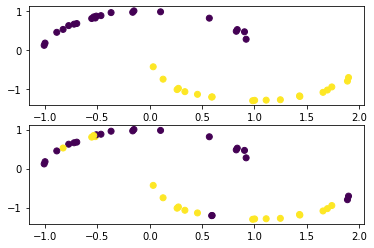

In [ ]:
qsvc = QSVC(quantum_kernel=kernel)

# To predict the time of training
from time import time
t1_before_training_QSVC_A200 = time()
# To train
qsvc.fit(x_train, y_train)
# To store training time globally
train_time_QSVC_A200 = round(time()-t1_before_training_QSVC_A200, 5)
print("Training time = ",train_time_QSVC_A200)

# To predict the time of testing
t1_before_testning_QSVC_A200 = time()
# To test
predicted_y_test = qsvc.predict(x_test)
# To store testing time globally
test_time_QSVC_A200 = round(time()-t1_before_testning_QSVC_A200, 5)
print("Testiing time = ", test_time_QSVC_A200)

# To store the score globally
ScoreQSVC_A200 = accuracy_score(y_test, predicted_y_test)
print("ScoreQSVC_A200 = ",ScoreQSVC_A200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### VQC (A200)

Training time =  268.37226
Testiing time =  1.18134
ScoreVQC_A200 =  0.25


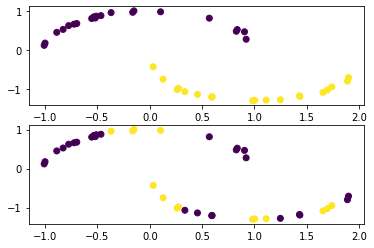

In [ ]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz, 
          loss='cross_entropy',
          optimizer=COBYLA(), 
          quantum_instance=backend)

# To predict the time of training
from time import time
t2_before_training_VQC_A200 = time()
# To train
train_y_one_hot = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
vqc.fit(x_train, train_y_one_hot)
# To store training time globally
train_time_VQC_A200 = round(time()-t2_before_training_VQC_A200, 5)
print("Training time = ",train_time_VQC_A200)

# To predict the time of testing
t2_before_testning_VQC_A200 = time()
# To test
predicted_y_test = vqc.predict(x_test)
predicted_y_test = np.argmax(predicted_y_test, axis=1) # reverse one-hot encoding
# To store testing time globally
test_time_VQC_A200 = round(time()-t2_before_testning_VQC_A200, 5)
print("Testiing time = ", test_time_VQC_A200)

# To store the score globally
ScoreVQC_A200 = accuracy_score(y_test, predicted_y_test)
print("ScoreVQC_A200 = ", ScoreVQC_A200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### CircuitQNN classifier (A200)

Training time =  324.84457
Testiing time =  164.41676
ScoreQNN_A200 =  0.8


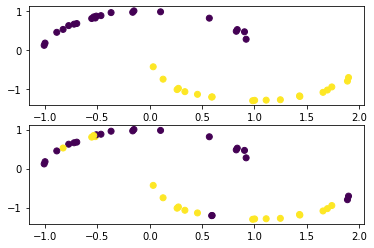

In [ ]:
# construct quantum circuit
qc = QuantumCircuit(num_qubits)
qc.append(feature_map, range(num_qubits))
qc.append(ansatz, range(num_qubits))
# qc.decompose().draw()

# parity maps bitstrings to 0 or 1
def parity(x):
    return '{:b}'.format(x).count('1') % num_classes
output_shape = num_classes  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

# construct QNN
circuit_qnn = CircuitQNN(circuit=qc, 
                         input_params=feature_map.parameters,
                         weight_params=ansatz.parameters,
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=backend)

# construct classifier
circuit_classifier = NeuralNetworkClassifier(neural_network=circuit_qnn, optimizer=COBYLA())

# To predict the time of training
from time import time
t3_before_training_QNN_A200 = time()
# To train
circuit_classifier.fit(x_train, y_train)
train_time_QNN_A200 = round(time()-t3_before_training_QNN_A200, 5)
print("Training time = ",train_time_QNN_A200)

# To predict the time of testing
t3_before_testning_QNN_A200 = time()
# To test
predicted_y_test_QNN = qsvc.predict(x_test)
test_time_QNN_A200 = round(time()-t3_before_testning_QNN_A200, 5)
print("Testiing time = ", test_time_QNN_A200)

ScoreQNN_A200 = accuracy_score(y_test, predicted_y_test_QNN)
print("ScoreQNN_A200 = ", ScoreQNN_A200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test_QNN)

## **(4) A dataset of size 200 (type B) generation by SVC with quantum kernal, QSVC, CQNN, VQC**

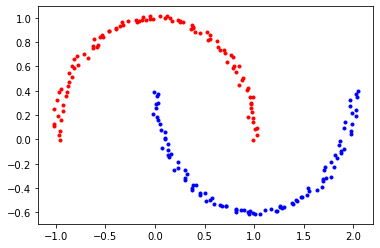

In [ ]:
# Two semicircles generation
import matplotlib.pyplot as plt
import numpy as np

def make_semi_circles(n_samples, thk, rad, sep, plot):
    noisey = np.random.uniform(low=-thk/100.0, high=thk/100.0, size=(n_samples // 2))
    noisex = np.random.uniform(low=-rad/100.0, high=rad/100.0, size=(n_samples // 2))
    
    separation = np.ones(n_samples // 2)*((-sep*0.1)-0.6)
    
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out
    
    # generator = check_random_state(random_state)
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out)) + noisex
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out)) + noisey
    inner_circ_x = (1 - np.cos(np.linspace(0, np.pi, n_samples_in))) + noisex
    inner_circ_y = (1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5) + noisey + separation
    
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.ones(n_samples_in, dtype=np.intp)*-1,
                   np.ones(n_samples_out, dtype=np.intp)])
    
    if plot:
        plt.plot(outer_circ_x, outer_circ_y, 'r.')
        plt.plot(inner_circ_x, inner_circ_y, 'b.')
        plt.show()

    return X, y

X, y = make_semi_circles(n_samples=200, thk=2, rad=5, sep=-5, plot=True)

In [ ]:
# split the data set as 15% in test set and 85% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SVC with quantum kernal (B200)

Training time =  315.83687
Testing time =  160.01458
ScoreSVCQK_B200 =  0.625


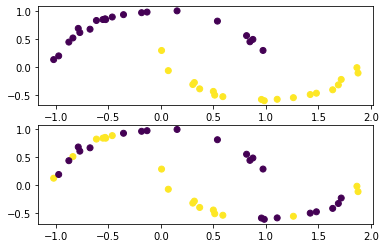

In [43]:
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
svc = SVC(kernel=kernel.evaluate)

# To predict the time of training
from time import time
t0_before_training_SVCQK_B200 = time()
# To train
svc.fit(x_train, y_train)
# To store training time globally
train_time_SVCQK_B200 = round(time()-t0_before_training_SVCQK_B200, 5)
print("Training time = ",train_time_SVCQK_B200)

# To predict the time of testing
t0_before_testning_SVCQK_B200 = time()
# To test
predicted_y_test = svc.predict(x_test)
# To store testing time globally
test_time_SVCQK_B200 = round(time()-t0_before_testning_SVCQK_B200, 5)
print("Testing time = ",test_time_SVCQK_B200)

# To store the score globally
ScoreSVCQK_B200 = accuracy_score(y_test, predicted_y_test)
print("ScoreSVCQK_B200 = ",ScoreSVCQK_B200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### QSVC (B200)

Training time =  320.84739
Testiing time =  159.72891
ScoreQSVC_B200 =  0.625


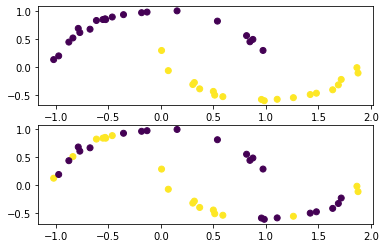

In [44]:
qsvc = QSVC(quantum_kernel=kernel)

# To predict the time of training
from time import time
t1_before_training_QSVC_B200 = time()
# To train
qsvc.fit(x_train, y_train)
# To store training time globally
train_time_QSVC_B200 = round(time()-t1_before_training_QSVC_B200, 5)
print("Training time = ",train_time_QSVC_B200)

# To predict the time of testing
t1_before_testning_QSVC_B200 = time()
# To test
predicted_y_test = qsvc.predict(x_test)
# To store testing time globally
test_time_QSVC_B200 = round(time()-t1_before_testning_QSVC_B200, 5)
print("Testiing time = ", test_time_QSVC_B200)

# To store the score globally
ScoreQSVC_B200 = accuracy_score(y_test, predicted_y_test)
print("ScoreQSVC_B200 = ",ScoreQSVC_B200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### VQC (B200)

In [ ]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz, 
          loss='cross_entropy',
          optimizer=COBYLA(), 
          quantum_instance=backend)

# To predict the time of training
from time import time
t2_before_training_VQC_B200 = time()
# To train
train_y_one_hot = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
vqc.fit(x_train, train_y_one_hot)
# To store training time globally
train_time_VQC_B200 = round(time()-t2_before_training_VQC_B200, 5)
print("Training time = ",train_time_VQC_B200)

# To predict the time of testing
t2_before_testning_VQC_B200 = time()
# To test
predicted_y_test = vqc.predict(x_test)
predicted_y_test = np.argmax(predicted_y_test, axis=1) # reverse one-hot encoding
# To store testing time globally
test_time_VQC_B200 = round(time()-t2_before_testning_VQC_B200, 5)
print("Testiing time = ", test_time_VQC_B200)

# To store the score globally
ScoreVQC_B200 = accuracy_score(y_test, predicted_y_test)
print("ScoreVQC_B200 = ", ScoreVQC_B200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test)

### CircuitQNN classifier (B200)

In [ ]:
# construct quantum circuit
qc = QuantumCircuit(num_qubits)
qc.append(feature_map, range(num_qubits))
qc.append(ansatz, range(num_qubits))
# qc.decompose().draw()

# parity maps bitstrings to 0 or 1
def parity(x):
    return '{:b}'.format(x).count('1') % num_classes
output_shape = num_classes  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

# construct QNN
circuit_qnn = CircuitQNN(circuit=qc, 
                         input_params=feature_map.parameters,
                         weight_params=ansatz.parameters,
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=backend)

# construct classifier
circuit_classifier = NeuralNetworkClassifier(neural_network=circuit_qnn, optimizer=COBYLA())

# To predict the time of training
from time import time
t3_before_training_QNN_B200 = time()
# To train
circuit_classifier.fit(x_train, y_train)
train_time_QNN_B200 = round(time()-t3_before_training_QNN_B200, 5)
print("Training time = ",train_time_QNN_B200)

# To predict the time of testing
t3_before_testning_QNN_B200 = time()
# To test
predicted_y_test_QNN = qsvc.predict(x_test)
test_time_QNN_B200 = round(time()-t3_before_testning_QNN_B200, 5)
print("Testiing time = ", test_time_QNN_B200)

ScoreQNN_B200 = accuracy_score(y_test, predicted_y_test_QNN)
print("ScoreQNN_B200 = ", ScoreQNN_B200)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_test[:,0], x_test[:,1], c=y_test)
ax2.scatter(x_test[:,0], x_test[:,1], c=predicted_y_test_QNN)

# End